In [32]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggthemes)
library(gridExtra)

In [33]:
setwd('C:/Users/karvo/Desktop/aueb/marketing-sales/exercise 1/karvou')

In [15]:
my_data<-read.csv(file='C:/Users/karvo/Desktop/aueb/marketing-sales/exercise 1/mark1.csv')
head(my_data)

Customer_ID,Gender,Birth_Date,Ref_Date,Marital_Status,Children_Num,Occupation_Category,Total_Income,Payroll_Flag,Business_Flag,...,Transfer_Trans_Amount,Credit_Cards_Installments,Credit_Cards_Payments_Num,Credit_Cards_Purchases_Num,Credit_Cards_Witrhdrawals_Num,Credit_Cards_Payments_Amount,Credit_Cards_Purchases_Amount,Credit_Cards_Witrhdrawals_Amount,Arrears_Months_Max,Time_Deposits_Flag
36163,Male,1/20/1968,12/31/2008,Single,0,Employees,17637,0,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0,1,FALSE
5904434,Male,4/7/1973,12/31/2008,Single,0,Rentiers,5800,0,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0,1,FALSE
5904453,Male,10/17/1960,12/31/2008,Married,2,Rentiers,14000,0,0,...,0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0,1,FALSE
855752,Male,7/28/1969,12/31/2008,Married,2,Business-Owners,54814,0,0,...,105,1.666667,0.666667,1.000000,0.000000,141.6667,230.450000,0,1,FALSE
81,Male,7/27/1950,12/31/2008,Married,2,Employees,64988,0,0,...,0,0.666667,0.666667,0.000000,0.000000,603.8167,0.000000,0,1,FALSE
112,Male,8/30/1957,12/31/2008,Married,1,Employees,38195,0,0,...,0,3.833333,3.000000,0.166667,0.166667,805.1750,4.296666,130,1,FALSE


In [16]:
str(my_data)

'data.frame':	120000 obs. of  46 variables:
 $ Customer_ID                     : int  36163 5904434 5904453 855752 81 112 113 855782 855784 855791 ...
 $ Gender                          : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 1 2 2 2 ...
 $ Birth_Date                      : Factor w/ 17756 levels "1/1/1939","1/1/1940",..: 618 10219 1929 14304 14236 15935 1098 15412 9438 14348 ...
 $ Ref_Date                        : Factor w/ 1 level "12/31/2008": 1 1 1 1 1 1 1 1 1 1 ...
 $ Marital_Status                  : Factor w/ 4 levels "Divorced","Married",..: 3 3 2 2 2 2 2 2 2 1 ...
 $ Children_Num                    : int  0 0 2 2 2 1 0 3 1 2 ...
 $ Occupation_Category             : Factor w/ 7 levels "Business-Owners",..: 3 4 4 1 3 3 3 3 1 1 ...
 $ Total_Income                    : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Business_Flag                   : int  0 0 0 0 0 0 0 0 1 0 ...
 $ 

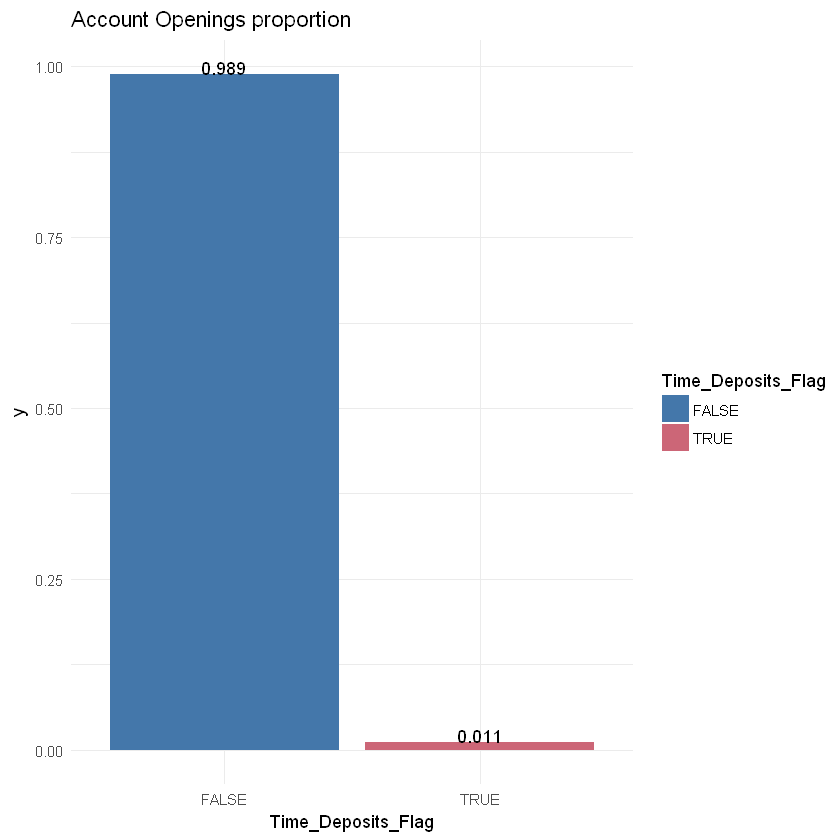

In [9]:
aux <- ddply(my_data, .(Time_Deposits_Flag), summarize, y=length(Time_Deposits_Flag)/120000)
ggplot(aux, aes(Time_Deposits_Flag, y,fill=Time_Deposits_Flag))+
geom_bar(stat="identity") +
    geom_text(aes(label=round(y,3)), vjust=0)+
    scale_fill_ptol()+
    theme_minimal()+
    ggtitle('Account Openings proportion')

In [24]:
ggsave('G1.pdf')

Saving 6.67 x 6.67 in image


# Creation of new variables

## Age

## Gender


In [401]:
my_data<-read.csv(file='C:/Users/karvo/Desktop/aueb/marketing-sales/exercise 1/mark1.csv')

## Mutations

In [402]:
library(lubridate)
my_data<-select(my_data,-1)
my_data$Age<-floor(as.period(mdy(my_data$Ref_Date)-mdy(my_data$Birth_Date))@day/365)
my_data<-my_data[,-c(2,3)]
my_data<-mutate(my_data,Liabilities=Insurance_Balances+Business_Loans_Balance+Housing_Loans_Balance+Consumer_Loans_Balance)
col<-c(17,18,19,20)
my_data<-my_data[,-col]
my_data<-mutate(my_data,Tot_Trans_Num=Branch_Trans_Num+ATM_Trans_Num+APS_Trans_Num+Phone_Trans_Num+Internet_Trans_Num)
my_data<-mutate(my_data,Cash_Position=(Branch_Trans_Num+ATM_Trans_Num)/Tot_Trans_Num)
my_data$Cash_Position[is.na(my_data$Cash_Position)]<-0
my_data<-mutate(my_data,Plastic_Position=(APS_Trans_Num+Phone_Trans_Num+Internet_Trans_Num)/Tot_Trans_Num)
my_data$Plastic_Position[is.na(my_data$Plastic_Position)]<-0
col<-c(18,19,20,21,22,42)
my_data<-my_data[,-col]
my_data<-mutate(my_data,Tot2=Deposit_Trans_Num+Withdrawl_Trans_Num+Payment_Trans_Num+Transfer_Trans_Num)
my_data<-mutate(my_data,Withdraw_Position=(Withdrawl_Trans_Num+Payment_Trans_Num+Transfer_Trans_Num)/Tot2)
my_data$Withdraw_Position[is.na(my_data$Withdraw_Position)]<-0
my_data<-mutate(my_data,Deposit_Position=Deposit_Trans_Num/Tot2)
my_data$Deposit_Position[is.na(my_data$Deposit_Position)]<-0
col<-c(18,19,20,21,39)
my_data<-my_data[,-col]
my_data<-mutate(my_data,Tot=Deposit_Trans_Amount+Withdrawl_Trans_Amount+Payment_Trans_Amount+Transfer_Trans_Amount)
my_data<-mutate(my_data,Cash_in_ratio=Deposit_Trans_Amount/Tot)
my_data$Cash_in_ratio[is.na(my_data$Cash_in_ratio)]<-0
my_data<-mutate(my_data,Cash_out_ratio=(Withdrawl_Trans_Amount+Payment_Trans_Amount+Transfer_Trans_Amount)/Tot)
my_data$Cash_out_ratio[is.na(my_data$Cash_out_ratio)]<-0
names(my_data)[names(my_data)=="Deposit_Trans_Amount"] <- "Cash_in_amount"
my_data<-mutate(my_data,Cash_out_amount=Withdrawl_Trans_Amount+Payment_Trans_Amount+Transfer_Trans_Amount)
col<-c(19,20,21,37)
my_data<-my_data[,-col]
col<-c(20,21,22)
my_data<-my_data[,-col]
my_data<-mutate(my_data,Credit_usage_amount=Credit_Cards_Payments_Amount
                +Credit_Cards_Purchases_Amount+Credit_Cards_Witrhdrawals_Amount)
my_data<-my_data[,-col]
my_data<-mutate(my_data,num_loans_categ=Business_Loans_Flag+Housing_Loans_Flag+Consumer_Loans_Flag)
my_data<-mutate(my_data,fitness=round(Cash_in_amount/Total_Income,digits=3))
my_data$fitness[is.na(my_data$fitness)]<-0
my_data$fitness[is.infinite(my_data$fitness)]<-0

In [265]:
str(my_data)

'data.frame':	120000 obs. of  33 variables:
 $ Gender                      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 1 2 2 2 ...
 $ Marital_Status              : Factor w/ 4 levels "Divorced","Married",..: 3 3 2 2 2 2 2 2 2 1 ...
 $ Children_Num                : int  0 0 2 2 2 1 0 3 1 2 ...
 $ Occupation_Category         : Factor w/ 7 levels "Business-Owners",..: 3 4 4 1 3 3 3 3 1 1 ...
 $ Total_Income                : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Business_Flag               : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Saving_Current_Accounts_Flag: int  1 1 1 1 0 1 1 1 1 1 ...
 $ Investment_Products_Flag    : int  0 0 0 1 0 1 0 1 0 0 ...
 $ Insurance_Products_Flag     : int  1 0 0 0 0 1 1 0 0 0 ...
 $ Business_Loans_Flag         : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Housing_Loans_Flag          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Consumer_Loans_Flag         : int  1 1 1 1 1 1 1 0 0 0 ...
 $ C

# recoding

In [403]:
library(car)
my_data$Arrears_Months_Max<-recode(my_data$Arrears_Months_Max,'0=1;1=2;2=2;3=2;4=2;5=3;6=3;7=3;8=3;9=3;10=3;11=3;12=3;13=3')
my_data$Age[my_data$Age<=30]<-1
my_data$Age[my_data$Age<=55]<-2
my_data$Age[my_data$age>55]<-3
my_data$Children_Num[my_data$Children_Num>0]<-1

## dummify

In [404]:
library(dummies)
my_data<-cbind(my_data,dummy('Gender',my_data,sep='_')[,1])
my_data<-my_data[,-1]
names(my_data)[33]<-'Gender_Female'

In [405]:
my_data<-cbind(my_data,dummy('Marital_Status',my_data,sep='_')[,c(1,3,4)])
my_data<-my_data[,-1]

In [406]:
my_data<-cbind(my_data,dummy('Occupation_Category',my_data,sep='_')[,c(2,3,4,5,6,7)])
my_data<-my_data[,-2]

In [210]:
str(my_data)

'data.frame':	120000 obs. of  40 variables:
 $ Children_Num                      : num  0 0 1 1 1 1 0 1 1 1 ...
 $ Total_Income                      : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Business_Flag                     : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Saving_Current_Accounts_Flag      : int  1 1 1 1 0 1 1 1 1 1 ...
 $ Investment_Products_Flag          : int  0 0 0 1 0 1 0 1 0 0 ...
 $ Insurance_Products_Flag           : int  1 0 0 0 0 1 1 0 0 0 ...
 $ Business_Loans_Flag               : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Housing_Loans_Flag                : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Consumer_Loans_Flag               : int  1 1 1 1 1 1 1 0 0 0 ...
 $ Credit_Cards_Flag                 : int  1 1 1 1 1 1 1 1 1 0 ...
 $ Saving_Current_Balance            : num  96 19.6 27.3 1240.1 0 ...
 $ Investment_Products_Balance       : num  0 0 0 1310 0 ...
 $ Credit_Cards_Balance              

In [270]:
my_data$Children_Num<-as.factor(my_data$Children_Num)
my_data<-cbind(my_data,dummy('Children_Num',my_data)[,2])
names(my_data)[41]<-'Has_Children'
my_data<-my_data[,-1]

# Leaving Flags out

In [407]:
flags<-3:11
my_data<-my_data[,-flags]

In [272]:
str(my_data)

'data.frame':	120000 obs. of  31 variables:
 $ Total_Income                      : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Investment_Products_Balance       : num  0 0 0 1310 0 ...
 $ Credit_Cards_Balance              : num  0 0 0 3595 1601 ...
 $ Cash_in_amount                    : num  0 0 110 176 0 ...
 $ Credit_Cards_Installments         : num  0 0 0 1.667 0.667 ...
 $ Arrears_Months_Max                : num  2 2 2 2 2 2 2 1 1 1 ...
 $ Time_Deposits_Flag                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Age                               : num  2 2 2 2 58 2 2 2 2 2 ...
 $ Liabilities                       : num  8659 5386 13032 5679 16148 ...
 $ Cash_Position                     : num  0.286 0 0.5 0.952 0.85 ...
 $ Plastic_Position                  : num  0.7143 1 0.5 0.0476 0.15 ...
 $ Withdraw_Position                 : num  1 1 0.5 0.824 1 ...
 $ Deposit_Position   

In [224]:
write.csv(my_data,file='mark_data.csv')

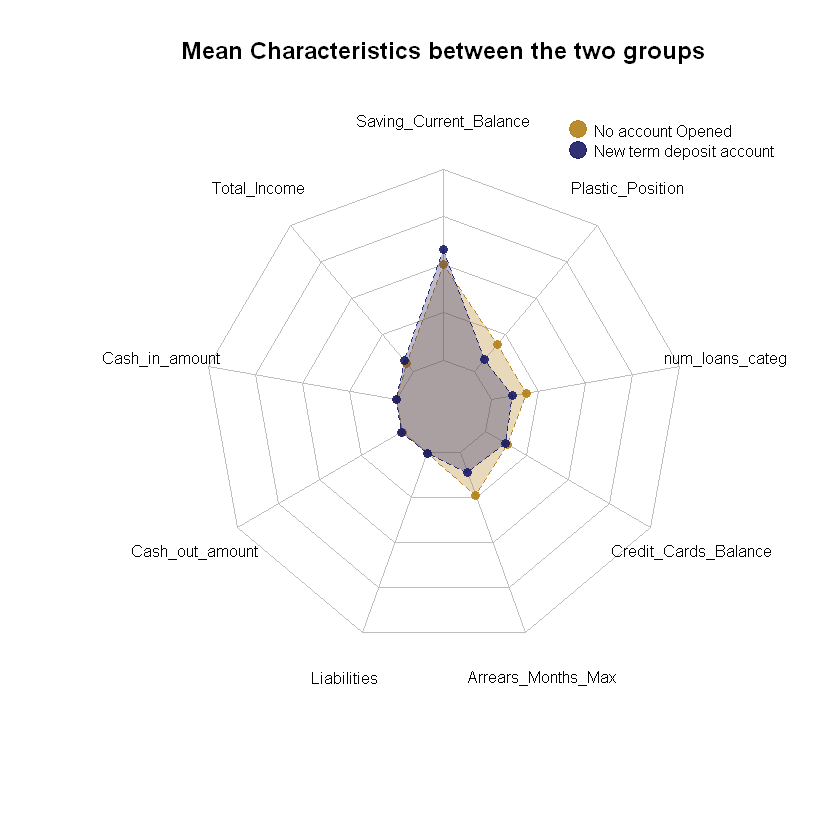

In [257]:
library(fmsb)
plot_data<-select(my_data,Saving_Current_Balance,Total_Income,Cash_in_amount,Cash_out_amount
                  ,Liabilities,Arrears_Months_Max,Credit_Cards_Balance,num_loans_categ,Plastic_Position,Time_Deposits_Flag)

mins<-as.numeric(apply(X = plot_data[,-10],2,min))
maxes<-as.numeric(apply(X = plot_data[,-10],2,max))
aux_data<-filter(my_data, Time_Deposits_Flag ==FALSE)
nms<-c('Saving_Current_Balance','Total_Income','Cash_in_amount','Cash_out_amount'
                  ,'Liabilities','Arrears_Months_Max','Credit_Cards_Balance','num_loans_categ','Plastic_Position')
s1<-filter(plot_data,Time_Deposits_Flag==FALSE)[,-10]
s2<-filter(plot_data,Time_Deposits_Flag==TRUE)[,-10]
means1<-as.numeric(apply(X = s1,2,mean))
means2<-as.numeric(apply(X = s2,2,mean))
auxx<-as.data.frame(rbind(maxes,mins,means1,means2))
colnames(auxx)<-nms
#nms<-names(aux_data)[-12]
#aux_data<-aux_data[,-12]
#means<-as.numeric(apply(X = aux_data,2,mean))
#auxx<-means
#for (i in 7:9){
#    aux_data<-filter(WinQ_w, quality ==i)
#    nms<-names(aux_data)[-12]
#    aux_data<-aux_data[,-12] 
#    means<-as.numeric(apply(X = aux_data,2,mean))
#    auxx<-rbind(auxx,means)}
#colnames(auxx)<-nms
#rownames(auxx)<-paste("Wine Quality" , 6:9 , sep=" ") 
#auxx<-as.data.frame(rbind(maxes,mins,auxx))
##auxx<-rbind
colors_border=c( rgb(0.7,0.5,0.1,0.9),rgb(0.1,0.1,0.4,0.9))
colors_in=c( rgb(0.7,0.5,0.1,0.3),rgb(0.1,0.1,0.4,0.3))
radarchart( auxx , axistype=0 , maxmin=T,title='Mean Characteristics between the two groups',
    #custom polygon
    pcol=colors_border , pfcol=colors_in , plwd=1 , plty=2,
    #custom the grid
    cglcol="grey", cglty=1, axislabcol="black", cglwd=0.8, 
    #custom labels
    vlcex=0.8 
    )
legend(x=.5, y=1.25, legend = c('No account Opened','New term deposit account'), bty = "n", pch=20 , col=colors_border , text.col = "black", cex=.8, pt.cex=3)
 

In [259]:
auxx

,Saving_Current_Balance,Total_Income,Cash_in_amount,Cash_out_amount,Liabilities,Arrears_Months_Max,Credit_Cards_Balance,num_loans_categ,Plastic_Position
maxes,4999.5350,1791574.00,247284.8333,229067.023,2971793.802,3.000000,69917.4133,3.0000000,1.00000000
mins,-4045.4317,-57755.00,0.0000,0.000,-5964.345,1.000000,-9128.6283,0.0000000,0.00000000
means1,477.3953,44366.40,298.9993,617.165,10749.869,1.477411,1238.8419,0.5687620,0.18319952
means2,1213.9471,77138.72,738.7579,1156.420,12159.545,1.218399,457.1214,0.3410621,0.08181431


In [258]:
ggsave('radar1.pdf')

Saving 6.67 x 6.67 in image


In [409]:
library(ellipse)
library(RColorBrewer)
 
# Use of the mtcars data proposed by R
data=cor(select(my_data,-Time_Deposits_Flag))
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors=colorRampPalette(my_colors)(100)
 
# Order the correlation matrix
ord <- order(data[1, ])
data_ord = data[ord, ord]
pdf(file.pdf,width=6.67,height=6.67,paper='special') 
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(1,1,1,1)  ,xlab = 'Correlation of Variables represented as ellipse')
dev.off()

ERROR: Error in gsub("%%", "", s): object 'file.pdf' not found


# splitting between train and test

In [165]:
random.seed=32
index <- sample(1:nrow(my_data),round(0.8*nrow(my_data)))
train <- my_data[index,]
test <- my_data[-index,]

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

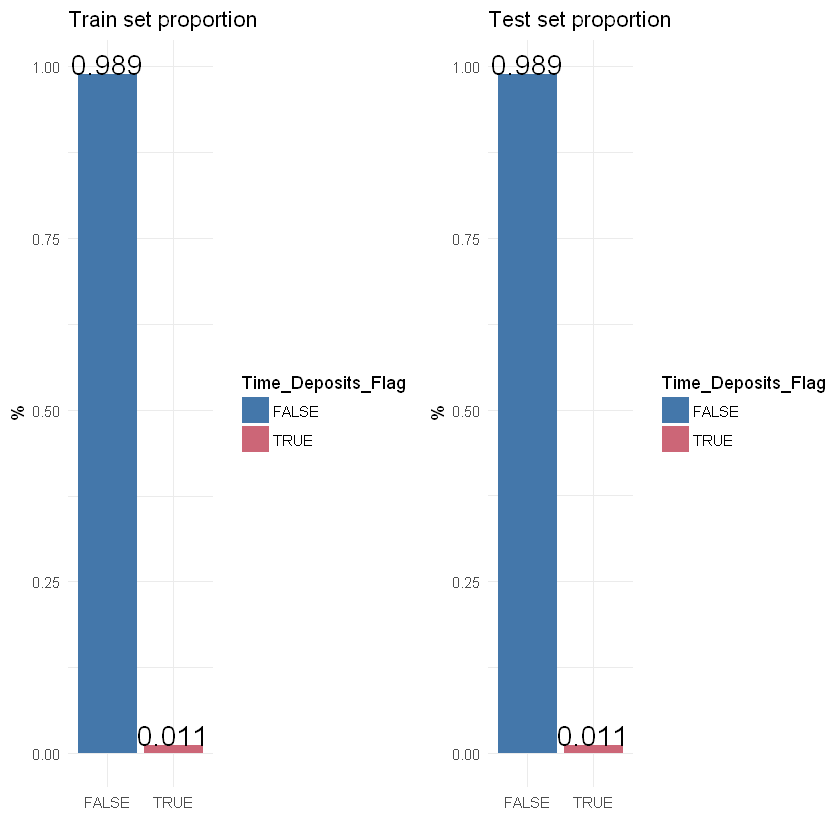

In [166]:
aux <- ddply(train, .(Time_Deposits_Flag), summarize, y=length(Time_Deposits_Flag)/dim(train)[1])
p1<-ggplot(aux, aes(Time_Deposits_Flag, y,fill=Time_Deposits_Flag))+
geom_bar(stat="identity") +
    geom_text(aes(label=round(y,3)), vjust=0,size=6)+
    ggtitle('Train set proportion')+
    ylab('%')+
    xlab(' ')+
    scale_fill_ptol()+
    theme_minimal()
aux <- ddply(test, .(Time_Deposits_Flag), summarize, y=length(Time_Deposits_Flag)/dim(test)[1])
p2<-ggplot(aux, aes(Time_Deposits_Flag, y,fill=Time_Deposits_Flag))+
geom_bar(stat="identity") +
    geom_text(aes(label=round(y,3)), vjust=0,size=6)+
    ggtitle('Test set proportion')+
    ylab('%')+
    xlab(' ')+
    scale_fill_ptol()+
    theme_minimal()
p<-grid.arrange(p1,p2,ncol=2)
p

Time_Deposits_Flag,y
FALSE,0.98885833
TRUE,0.01114167


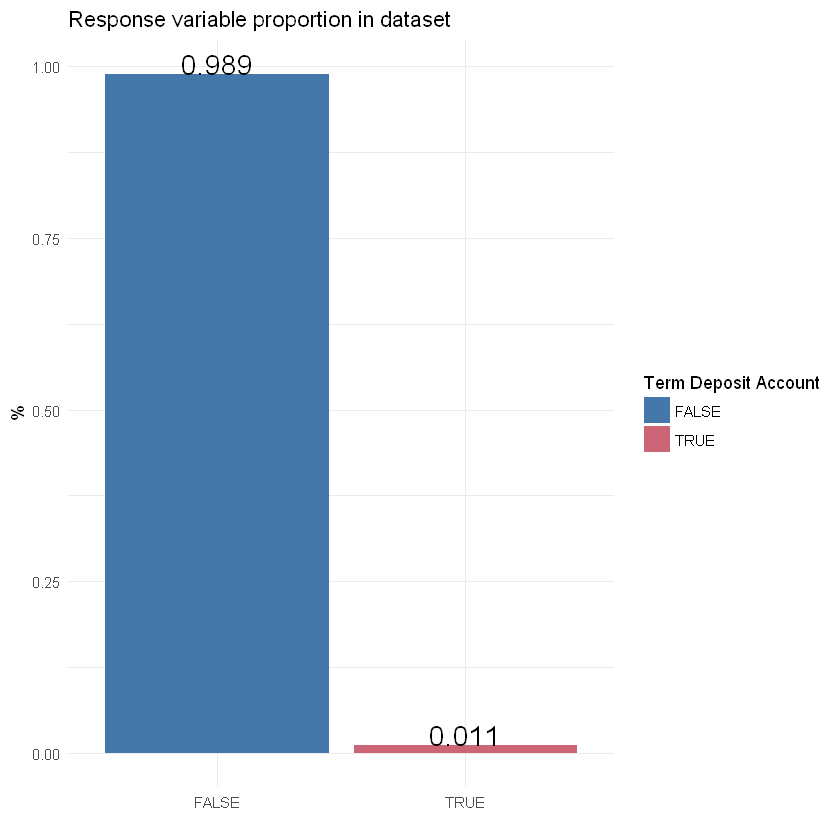

In [181]:
aux <- ddply(my_data, .(Time_Deposits_Flag), summarize, y=length(Time_Deposits_Flag)/120000)
ggplot(aux, aes(Time_Deposits_Flag,y,fill=Time_Deposits_Flag))+
geom_bar(stat='identity')+
geom_text(aes(label=round(y,3)), vjust=0,size=6)+
ggtitle('Response variable proportion in dataset')+
ylab('%')+
xlab(' ')+
scale_fill_ptol(name='Term Deposit Account')+
theme_minimal()
aux

In [183]:
ggsave('Imba.pdf')

Saving 6.67 x 6.67 in image


# Data Viz-Exploratory

Warning message:
"package 'corrr' was built under R version 3.3.3"

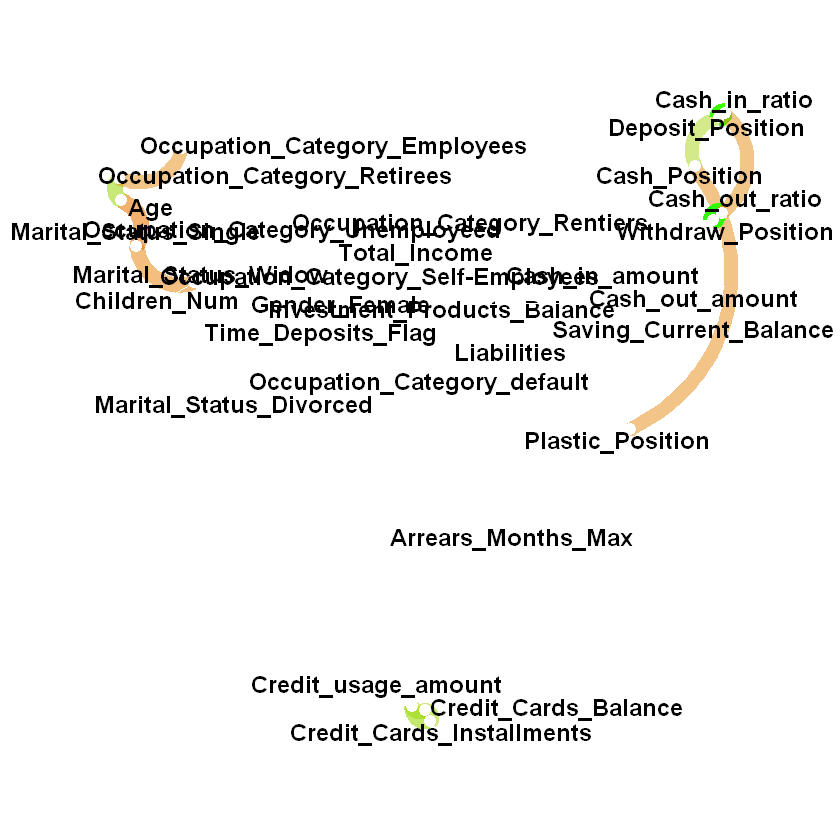

In [12]:
library(corrr)

my_data %>% correlate() %>% network_plot(min_cor=0.4,colors = c("red", "green"), legend = TRUE)

In [339]:
str(my_data)

'data.frame':	120000 obs. of  31 variables:
 $ Total_Income                      : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Investment_Products_Balance       : num  0 0 0 1310 0 ...
 $ Credit_Cards_Balance              : num  0 0 0 3595 1601 ...
 $ Cash_in_amount                    : num  0 0 110 176 0 ...
 $ Credit_Cards_Installments         : num  0 0 0 1.667 0.667 ...
 $ Arrears_Months_Max                : num  2 2 2 2 2 2 2 1 1 1 ...
 $ Time_Deposits_Flag                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Age                               : num  2 2 2 2 58 2 2 2 2 2 ...
 $ Liabilities                       : num  8659 5386 13032 5679 16148 ...
 $ Cash_Position                     : num  0.286 0 0.5 0.952 0.85 ...
 $ Plastic_Position                  : num  0.7143 1 0.5 0.0476 0.15 ...
 $ Withdraw_Position                 : num  1 1 0.5 0.824 1 ...
 $ Deposit_Position   

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

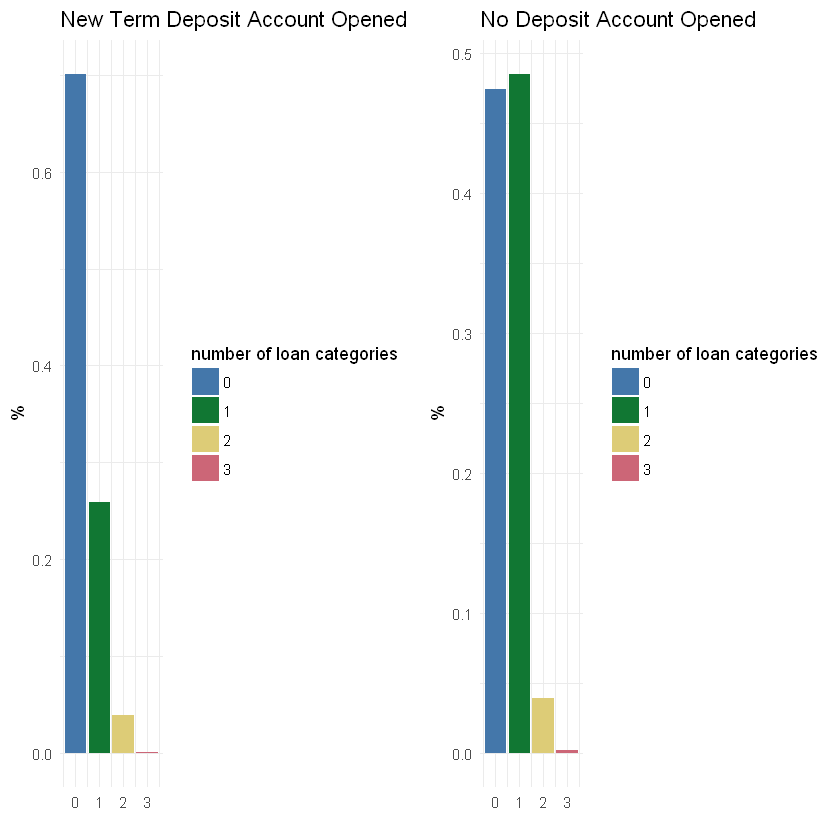

In [344]:
p1<-ggplot(filter(my_data,Time_Deposits_Flag==TRUE),aes(num_loans_categ,fill=factor(num_loans_categ)))+
geom_bar(aes(y=(..count..)/sum(..count..)),position='dodge')+
xlab(' ')+
ylab('%')+
theme_minimal()+
ggtitle('New Term Deposit Account Opened')+
scale_fill_ptol(name='number of loan categories')
p2<-ggplot(filter(my_data,Time_Deposits_Flag==FALSE),aes(num_loans_categ,fill=factor(num_loans_categ)))+
geom_bar(aes(y=(..count..)/sum(..count..)),position='dodge')+
xlab(' ')+
ylab('%')+
theme_minimal()+
ggtitle('No Deposit Account Opened')+
scale_fill_ptol(name='number of loan categories')
p<-grid.arrange(p1,p2,ncol=2)
p

In [345]:
ggsave('num_loan.pdf',p)

Saving 6.67 x 6.67 in image


In [85]:
ggsave('InvestF.pdf',p)

Saving 6.67 x 6.67 in image


In [293]:
str(my_data)

'data.frame':	120000 obs. of  31 variables:
 $ Total_Income                      : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Investment_Products_Balance       : num  0 0 0 1310 0 ...
 $ Credit_Cards_Balance              : num  0 0 0 3595 1601 ...
 $ Cash_in_amount                    : num  0 0 110 176 0 ...
 $ Credit_Cards_Installments         : num  0 0 0 1.667 0.667 ...
 $ Arrears_Months_Max                : num  2 2 2 2 2 2 2 1 1 1 ...
 $ Time_Deposits_Flag                : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Age                               : num  2 2 2 2 58 2 2 2 2 2 ...
 $ Liabilities                       : num  8659 5386 13032 5679 16148 ...
 $ Cash_Position                     : num  0.286 0 0.5 0.952 0.85 ...
 $ Plastic_Position                  : num  0.7143 1 0.5 0.0476 0.15 ...
 $ Withdraw_Position                 : num  1 1 0.5 0.824 1 ...
 $ Deposit_Position   

p1<-ggplot(filter(my_data,Time_Deposits_Flag==TRUE),aes(De
geom_density()+
xlab(' ')+
ylab(' ')+
theme_minimal()+
ggtitle('New Account Opened')+
scale_fill_ptol()
p2<-ggplot(filter(my_data,Time_Deposits_Flag==FALSE),aes(Marital_Status,fill=Marital_Status))+
geom_bar(aes(y=(..count..)/sum(..count..)),position='dodge')+
xlab(' ')+
ylab('%')+
theme_minimal()+
ggtitle('No Opening')+
scale_fill_ptol()+
coord_flip()
grid.arrange(p1,p2,ncol=1)

In [322]:
summary(my_data$fitnessness)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 -2.73200   0.00000   0.00000   0.02073   0.00500 120.40000 

Warning message:
"Removed 20652 rows containing non-finite values (stat_density)."

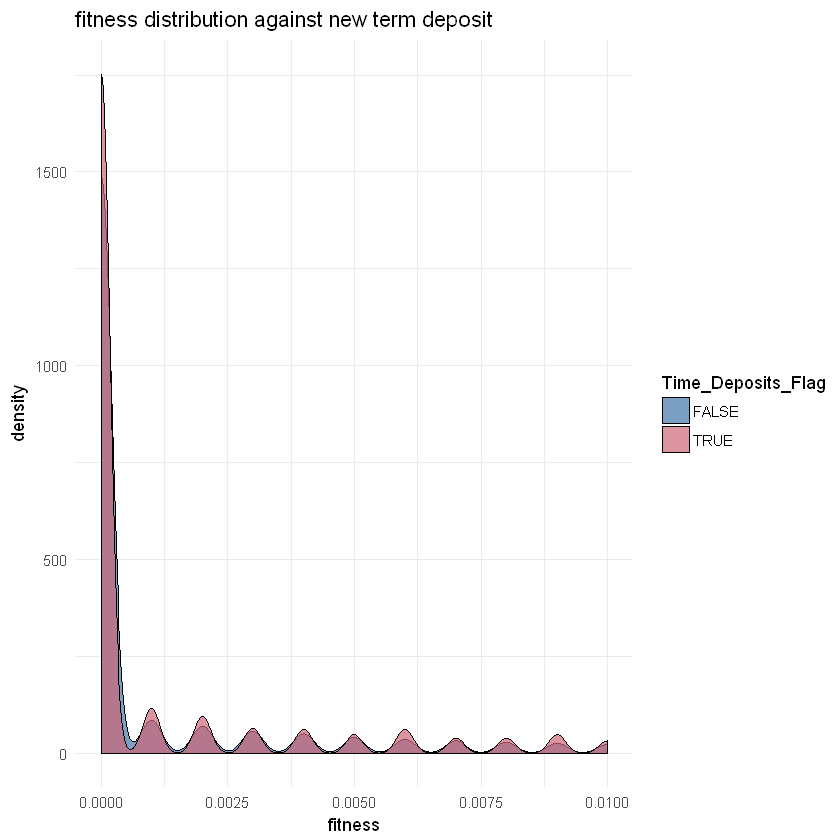

In [337]:
ggplot(my_data,aes(x=fitness,fill=Time_Deposits_Flag))+
geom_density(alpha=0.7)+
scale_fill_ptol()+
theme_minimal()+
scale_x_continuous(limits=c(0,.01))+
xlab('fitness')+
#scale_x_log10()+
ggtitle('fitness distribution against new term deposit')

In [338]:
ggsave('fitness_1.pdf')

Saving 6.67 x 6.67 in image
Warning message:
"Removed 20652 rows containing non-finite values (stat_density)."

In [351]:
str(my_data)

'data.frame':	120000 obs. of  33 variables:
 $ Gender                      : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 1 2 2 2 ...
 $ Marital_Status              : Factor w/ 4 levels "Divorced","Married",..: 3 3 2 2 2 2 2 2 2 1 ...
 $ Children_Num                : int  0 0 2 2 2 1 0 3 1 2 ...
 $ Occupation_Category         : Factor w/ 7 levels "Business-Owners",..: 3 4 4 1 3 3 3 3 1 1 ...
 $ Total_Income                : int  17637 5800 14000 54814 64988 38195 86872 73785 134009 11320 ...
 $ Payroll_Flag                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Business_Flag               : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Saving_Current_Accounts_Flag: int  1 1 1 1 0 1 1 1 1 1 ...
 $ Investment_Products_Flag    : int  0 0 0 1 0 1 0 1 0 0 ...
 $ Insurance_Products_Flag     : int  1 0 0 0 0 1 1 0 0 0 ...
 $ Business_Loans_Flag         : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Housing_Loans_Flag          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ Consumer_Loans_Flag         : int  1 1 1 1 1 1 1 0 0 0 ...
 $ C

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 55 rows containing non-finite values (stat_binhex)."Warning message in self$trans$transform(x):
"NaNs produced"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 6179 rows containing non-finite values (stat_binhex)."

TableGrob (1 x 2) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]

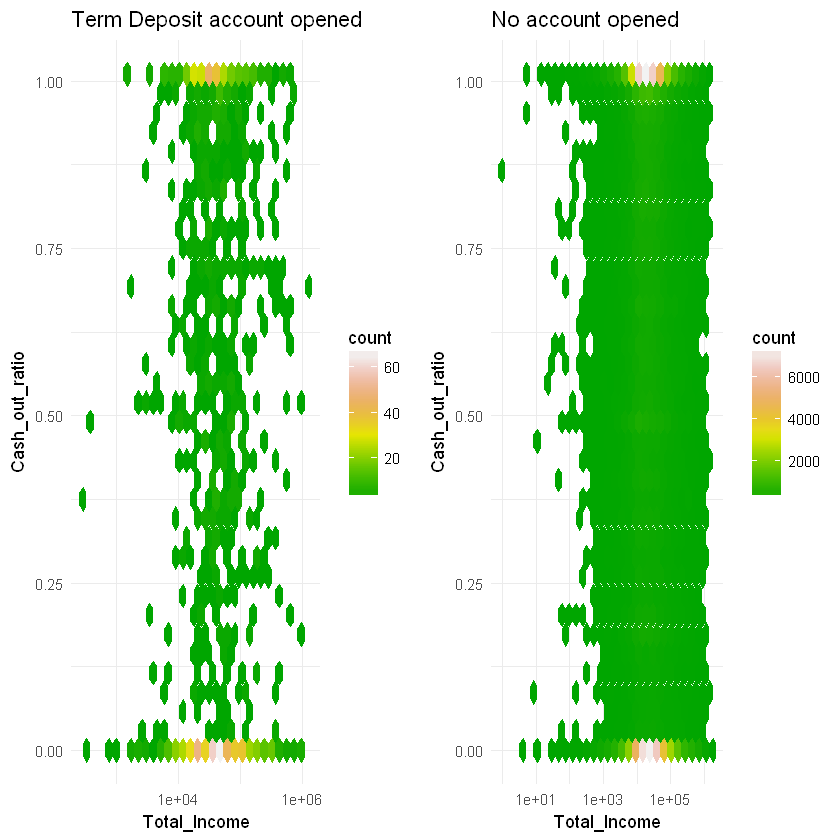

In [398]:
p1<-ggplot(filter(my_data,Time_Deposits_Flag==TRUE),aes(Total_Income,Cash_out_ratio))+
geom_hex()+
#scale_y_log10()+
scale_x_log10()+
theme_minimal()+
scale_fill_gradientn(colours = terrain.colors(10))+
ggtitle('Term Deposit account opened')
p2<-ggplot(filter(my_data,Time_Deposits_Flag==FALSE),aes(Total_Income,Cash_out_ratio))+
geom_hex()+
#scale_y_log10()+
scale_x_log10()+
theme_minimal()+
scale_fill_gradientn(colours = terrain.colors(10))+
ggtitle('No account opened')
p<-grid.arrange(p1,p2,ncol=2)
p

In [399]:
ggsave('bin3.pdf',p)

Saving 6.67 x 6.67 in image


# Payroll Flag

In [9]:
unique(my_data$Payroll_Flag)

[1] 0 1

In [11]:
unique(my_data$Business_Flag)

[1] 0 1

In [12]:
unique(my_data$Saving_Current_Accounts_Flag)

[1] 1 0

# Decision Trees

In [39]:
length(unique(my_data$Customer_ID))

[1] 120000

In [47]:
library(rpart)
formula<-Time_Deposits_Flag~Credit_Cards_Payments_Num
model<-rpart(Time_Deposits_Flag~.,method='class',data=my_data)

In [48]:
printcp(model)


Classification tree:
rpart(formula = Time_Deposits_Flag ~ ., data = my_data, method = "class")

Variables actually used in tree construction:
[1] Birth_Date             Saving_Current_Balance

Root node error: 1337/120000 = 0.011142

n= 120000 

        CP nsplit rel error xerror     xstd
1 0.045625      0   1.00000 1.0000 0.027196
2 0.015707      3   0.86313 1.3291 0.031295
3 0.014959      5   0.83171 1.3291 0.031295
4 0.014211      6   0.81675 1.3328 0.031338
5 0.010000      7   0.80254 1.3209 0.031199


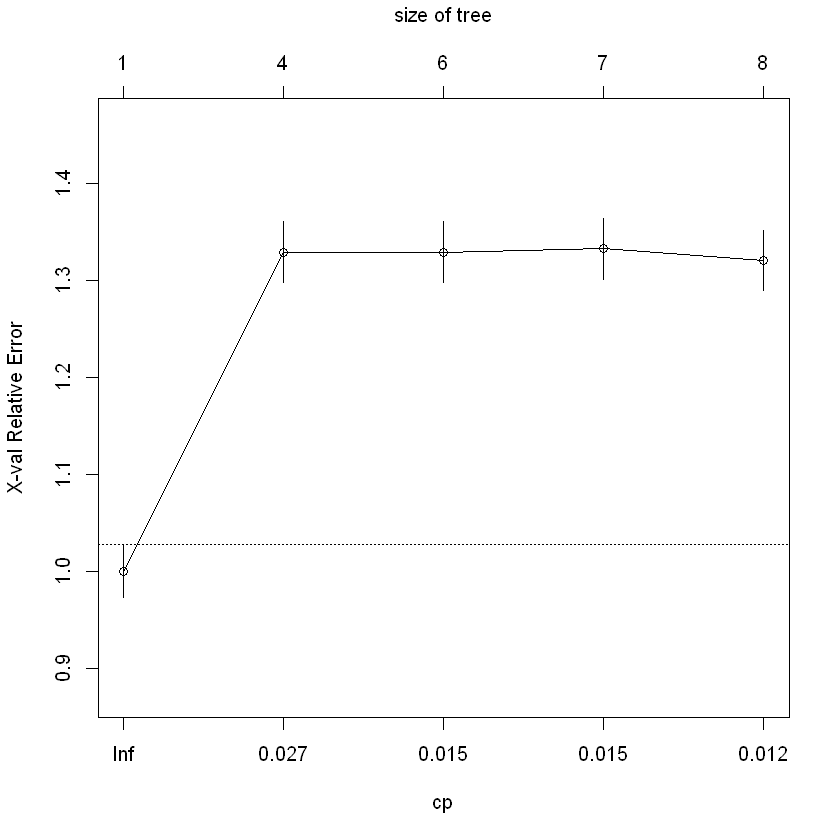

In [49]:
plotcp(model)

In [50]:
summary(model)

Call:
rpart(formula = Time_Deposits_Flag ~ ., data = my_data, method = "class")
  n= 120000 

          CP nsplit rel error   xerror       xstd
1 0.04562453      0 1.0000000 1.000000 0.02719577
2 0.01570681      3 0.8631264 1.329095 0.03129484
3 0.01495886      5 0.8317128 1.329095 0.03129484
4 0.01421092      6 0.8167539 1.332835 0.03133817
5 0.01000000      7 0.8025430 1.320868 0.03119928

Variable importance
            Birth_Date Saving_Current_Balance  Transfer_Trans_Amount 
                    78                     15                      1 
  Deposit_Trans_Amount Withdrawl_Trans_Amount     Transfer_Trans_Num 
                     1                      1                      1 

Node number 1: 120000 observations,    complexity param=0.04562453
  predicted class=FALSE  expected loss=0.01114167  P(node) =1
    class counts: 118663  1337
   probabilities: 0.989 0.011 
  left son=2 (110128 obs) right son=3 (9872 obs)
  Primary splits:
      Birth_Date             splits as  LLLLLL

Warning message in labels.rpart(x, minlength = minlength):
"more than 52 levels in a predicting factor, truncated for printout"

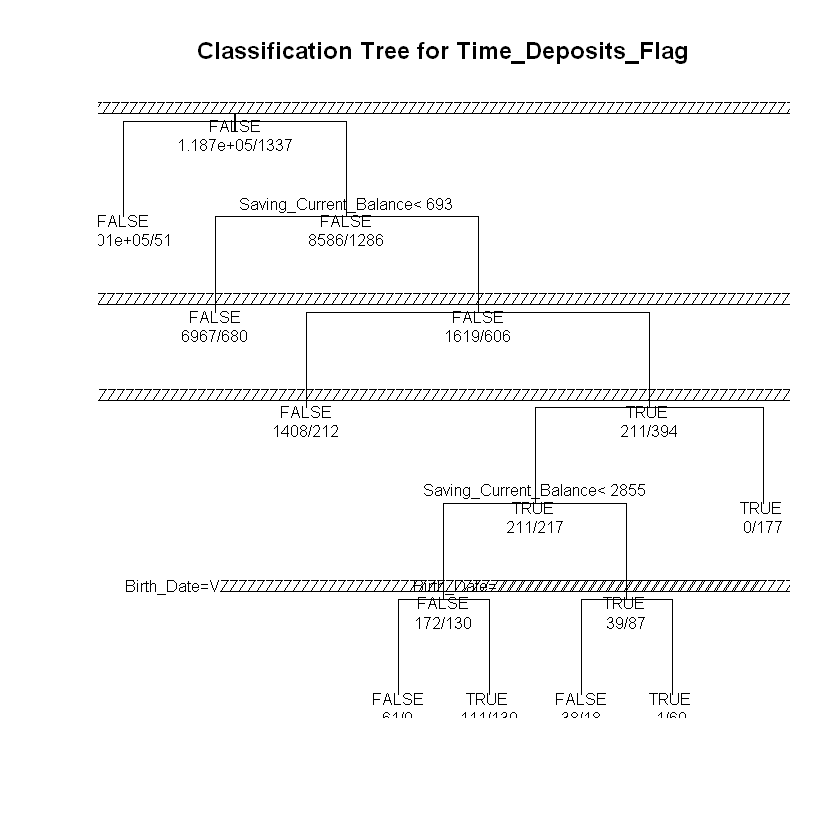

In [54]:
plot(model, uniform=TRUE, main="Classification Tree for Time_Deposits_Flag")
text(model, use.n=TRUE, all=TRUE, cex=.8)

## tree package

In [64]:
library(tree)
my_data$Time_Deposits_Flag<-as.factor(my_data$Time_Deposits_Flag)
formula<-Time_Deposits_Flag~Gender
Tree<-tree(formula,data=my_data,split='gini')

In [65]:
summary(Tree)


Classification tree:
tree(formula = formula, data = my_data, split = "gini")
Number of terminal nodes:  2 
Residual mean deviance:  0.1221 = 14650 / 120000 
Misclassification error rate: 0.01114 = 1337 / 120000 

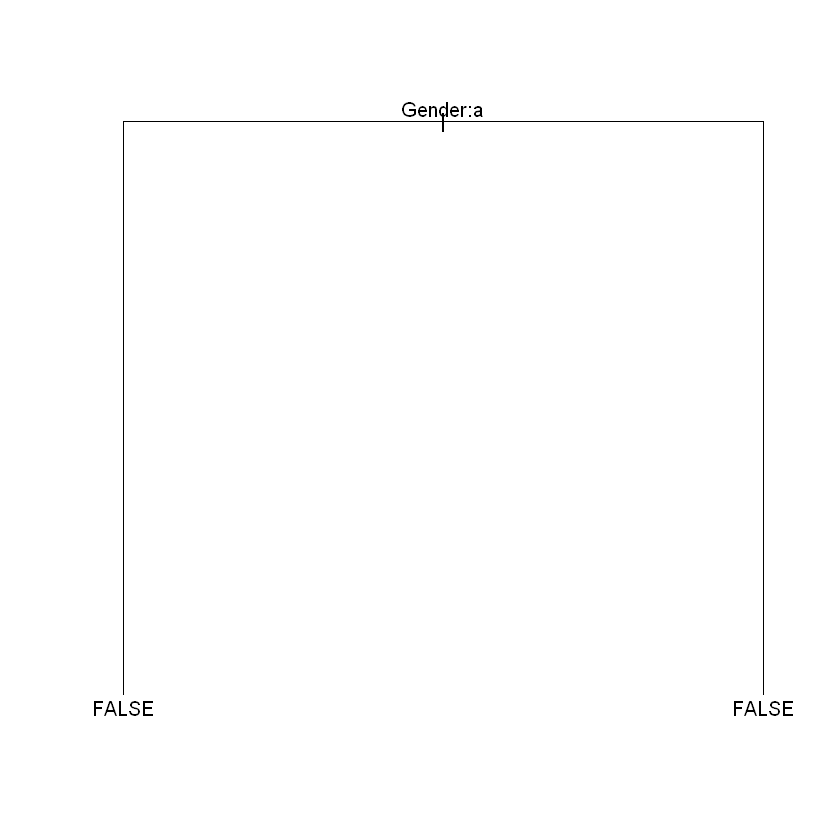

In [66]:
plot(Tree)
text(Tree)

# Foresting


In [76]:
library(randomForest)
forest<-randomForest(formula,data=my_data,ntree = 30)

In [74]:
print(forest)


Call:
 randomForest(formula = formula, data = my_data, ntree = 30) 
               Type of random forest: classification
                     Number of trees: 30
No. of variables tried at each split: 1

        OOB estimate of  error rate: 1.11%
Confusion matrix:
       FALSE TRUE class.error
FALSE 118663    0           0
TRUE    1337    0           1


In [75]:
importance(forest)

,MeanDecreaseGini
Gender,0.7301195


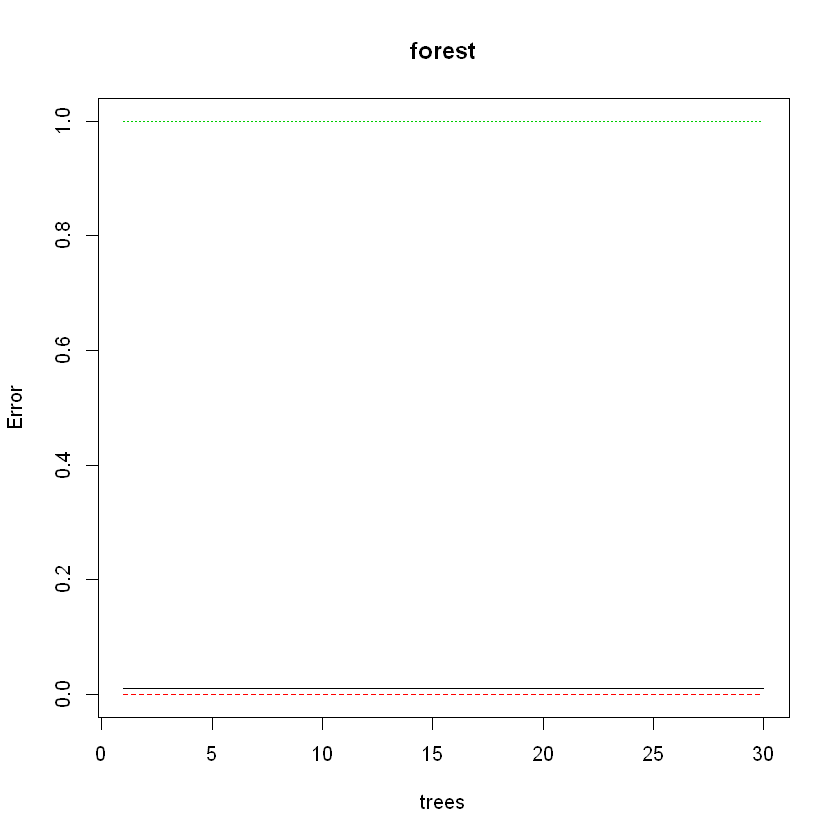

In [77]:
plot(forest)

# NN

In [150]:
library(neuralnet)
maxs <- apply(my_data, 2, max) 
mins <- apply(my_data, 2, min)
scaled <- as.data.frame(scale(my_data, center = mins, scale = maxs - mins))
train_ <- scaled[index,]
test_ <- scaled[-index,]

ERROR: Error in scale.default(my_data, center = mins, scale = maxs - mins): length of 'center' must equal the number of columns of 'x'


In [148]:
library(neuralnet)
n <- names(train_)
f <- as.formula(paste("Time_Deposits_Flag ~", paste(n[!n %in% "medv"], collapse = " + ")))
nn <- neuralnet(f,data=train_,hidden=c(3,1),linear.output=F)

ERROR: Error in neurons[[i]] %*% weights[[i]]: requires numeric/complex matrix/vector arguments
